In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from settings.constants import TRAIN_CSV, TEST_CSV, VAL_CSV, DATA_FOLDER
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

import warnings

warnings.filterwarnings('ignore')

### Load the data

In [30]:
train = pd.read_csv(TRAIN_CSV, header=0)
test = pd.read_csv(TEST_CSV, header=0)
val = pd.read_csv(VAL_CSV, header=0)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
y = train[['Id', 'SalePrice']]
train = train.drop('SalePrice', axis=1)
full_df = pd.concat([train, test]).reset_index(drop=True)

def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

display_all(full_df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Data preprocessing and feature engineering

In [32]:
# from utils import DataLoader
# loader = DataLoader()
# loader.fit(full_df)
# full_df = loader.load_data()

In [33]:
print('Drop columns with too many null values:')
dropped = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Utilities']
full_df.drop(dropped, axis=1, inplace=True)
print(dropped)
print('\n\nFeatures that store null values')
null_containing = full_df.isnull().sum()
display_all(null_containing[null_containing > 0])

Drop columns with too many null values:
['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Utilities']


Features that store null values


MSZoning          4
LotFrontage     486
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinSF1        1
BsmtFinType2     80
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
SaleType          1
dtype: int64

#### Fill null values with something more valuable

In [34]:
full_df['LotFrontage'].fillna(value=full_df['LotFrontage'].median(), inplace=True)
full_df['MasVnrType'].fillna(value='None', inplace=True)
full_df['MasVnrArea'].fillna(0, inplace=True)
full_df['BsmtCond'].fillna(value='TA', inplace=True)
full_df['BsmtExposure'].fillna(value='No', inplace=True)
full_df['Electrical'].fillna(value='SBrkr', inplace=True)
full_df['BsmtFinType2'].fillna(value='Unf', inplace=True)
full_df['GarageType'].fillna(value='Attchd', inplace=True)
full_df['GarageYrBlt'].fillna(value=full_df['GarageYrBlt'].median(), inplace=True)
full_df['GarageFinish'].fillna(value='Unf', inplace=True)
full_df['GarageQual'].fillna(value='TA', inplace=True)
full_df['GarageCond'].fillna(value='TA', inplace=True)
full_df['BsmtFinType1'].fillna(value='NO', inplace=True)
full_df['BsmtQual'].fillna(value='No', inplace=True)
full_df['BsmtFullBath'].fillna(value=full_df['BsmtFullBath'].median(), inplace=True)
full_df['BsmtFinSF1'].fillna(value=full_df['BsmtFinSF1'].median(), inplace=True)
full_df['BsmtFinSF2'].fillna(value=0, inplace=True)
full_df['BsmtUnfSF'].fillna(value=0, inplace=True)
full_df['TotalBsmtSF'].fillna(value=full_df['TotalBsmtSF'].median(), inplace=True)
full_df['BsmtHalfBath'].fillna(value=0, inplace=True)
full_df['GarageCars'].fillna(value=full_df['GarageCars'].median(), inplace=True)
full_df['GarageArea'].fillna(value=full_df['GarageArea'].median(), inplace=True)

#### Encode all data using Label Encoding

In [35]:
le = LabelEncoder()

full_df['MSZoning'] = le.fit_transform(full_df['MSZoning'])
full_df['Exterior1st'] = le.fit_transform(full_df['Exterior1st'])
full_df['Exterior2nd'] = le.fit_transform(full_df['Exterior2nd'])
full_df['KitchenQual'] = le.fit_transform(full_df['KitchenQual'])
full_df['Functional'] = le.fit_transform(full_df['Functional'].astype(str))
full_df['SaleType'] = le.fit_transform(full_df['SaleType'].astype(str))
full_df['Street'] = le.fit_transform(full_df['Street'])
full_df['LotShape'] = le.fit_transform(full_df['LotShape'])
full_df['LandContour'] = le.fit_transform(full_df['LandContour'])
full_df['LotConfig'] = le.fit_transform(full_df['LotConfig'])
full_df['LandSlope'] = le.fit_transform(full_df['LandSlope'])
full_df['Neighborhood'] = le.fit_transform(full_df['Neighborhood'])
full_df['Condition1'] = le.fit_transform(full_df['Condition1'])
full_df['Condition2'] = le.fit_transform(full_df['Condition2'])
full_df['BldgType'] = le.fit_transform(full_df['BldgType'])
full_df['HouseStyle'] = le.fit_transform(full_df['HouseStyle'])
full_df['RoofStyle'] = le.fit_transform(full_df['RoofStyle'])
full_df['RoofMatl'] = le.fit_transform(full_df['RoofMatl'])
full_df['MasVnrType'] = le.fit_transform(full_df['MasVnrType'])
full_df['ExterQual'] = le.fit_transform(full_df['ExterQual'])
full_df['ExterCond'] = le.fit_transform(full_df['ExterCond'])
full_df['Foundation'] = le.fit_transform(full_df['Foundation'])
full_df['BsmtQual'] = le.fit_transform(full_df['BsmtQual'])
full_df['BsmtCond'] = le.fit_transform(full_df['BsmtCond'])
full_df['BsmtExposure'] = le.fit_transform(full_df['BsmtExposure'])
full_df['BsmtFinType1'] = le.fit_transform(full_df['BsmtFinType1'])
full_df['BsmtFinType2'] = le.fit_transform(full_df['BsmtFinType2'])
full_df['Heating'] = le.fit_transform(full_df['Heating'])
full_df['HeatingQC'] = le.fit_transform(full_df['HeatingQC'])
full_df['CentralAir'] = le.fit_transform(full_df['CentralAir'])
full_df['Electrical'] = le.fit_transform(full_df['Electrical'])
full_df['GarageType'] = le.fit_transform(full_df['GarageType'])
full_df['GarageFinish'] = le.fit_transform(full_df['GarageFinish'])
full_df['GarageQual'] = le.fit_transform(full_df['GarageQual'])
full_df['GarageCond'] = le.fit_transform(full_df['GarageCond'])
full_df['PavedDrive'] = le.fit_transform(full_df['PavedDrive'])
full_df['SaleCondition'] = le.fit_transform(full_df['SaleCondition'])

#### Scale the dataset

In [36]:
Scaler = StandardScaler()
full_df_scaled = pd.DataFrame(Scaler.fit_transform(full_df))

train_scaled = pd.DataFrame(full_df_scaled[:1460])
test_scaled = pd.DataFrame(full_df_scaled[1460:2920])
print(train_scaled.shape, test_scaled.shape)

(1460, 74) (1459, 74)


In [37]:
X = train_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y['SalePrice'], test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1314, 74) (146, 74) (1314,) (146,)


### Fuction to evaluate model

In [38]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Model Selection

<AxesSubplot:title={'center':'Regressor MSE'}, xlabel='MSE', ylabel='Regressor'>

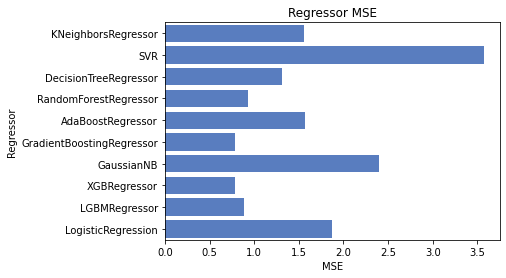

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

regressors = [
    KNeighborsRegressor(3),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    GaussianNB(),
    XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, reg_alpha=0.001,
                   reg_lambda=0.000001, n_jobs=-1, min_child_weight=3),
    LGBMRegressor(n_estimators=1000),
    LogisticRegression()
]
log_cols = ["Regressor", "MSE"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for rgs in regressors:
    name = rgs.__class__.__name__
    rgs.fit(X_train, y_train)
    train_predictions = rgs.predict(X_test)
    acc = mean_absolute_percentage_error(y_test, train_predictions)

    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for rgs in acc_dict:
    acc_dict[rgs] = acc_dict[rgs] / 10.0
    log_entry = pd.DataFrame([[rgs, acc_dict[rgs]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('MSE')
plt.title('Regressor MSE')

sns.set_color_codes("muted")
sns.barplot(x='MSE', y='Regressor', data=log, color="b")

### Gradient Boosting Regressor model

In [41]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)

# print ("XGB Training score:",GBR.score(X_train,y_train),"Test Score:",GBR.score(X_test,y_test))

GradientBoostingRegressor()

In [42]:
y_pred_gbr = pd.DataFrame(GBR.predict(test_scaled))
y_pred = pd.DataFrame()
y_pred['Id'] = test['Id']
y_pred['SalePrice'] = y_pred_gbr[0]

### Models score

In [46]:
import pickle
from utils import DataLoader
# raw_val = pd.read_csv(VAL_CSV, header=0)
# raw_val.reset_index(drop=True)

y_test = pd.read_csv(VAL_CSV)['SalePrice']
# raw_val = raw_val.drop('SalePrice', axis=1)

# loader = DataLoader()
# loader.fit(raw_val)
# X = loader.load_data()

# Scaler = StandardScaler()
# X = pd.DataFrame(Scaler.fit_transform(X))
# print(X.head())
# print(X_test.head())
# print(GBR.score(X_test, y_test))
loaded_model = pickle.load(open('models/GBR.pickle', 'rb'))
print(loaded_model.score(test_scaled, y_test))
print(GBR.score(test_scaled, y_test))

-18.721904383452745
-18.47282963829574


In [ ]:
# X.head()
test_scaled.head()

### Submission

In [ ]:
y_pred.to_csv(os.path.join(DATA_FOLDER, 'submission.csv'), index=False)